Import necessary module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load datasets from Google Drive
dataset1 = pd.read_csv('/content/drive/My Drive/Data Foundation/Dataset/dataset1.csv')
dataset2 = pd.read_csv('/content/drive/My Drive/Data Foundation/Dataset/dataset2.csv')
dataset3 = pd.read_csv('/content/drive/My Drive/Data Foundation/Dataset/dataset3.csv')

# Display the first few rows
dataset1.head()


,ID,gender,minority,deprived
0,1087360,0,0,0
1,1088938,0,1,0
2,1088953,0,1,0
3,1088961,0,1,0
4,1089147,0,1,0


In [6]:
# Merge datasets based on 'ID' column
merged_data = pd.merge(dataset1, dataset2, on='ID')
merged_data = pd.merge(merged_data, dataset3, on='ID')

# Inspect the first few rows
merged_data.head()

,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,1087192,0,0,0,2.0,0.5,0.5,0.5,1.0,0.5,...,4,4,4,4,5,4,4,5,4,4
1,1087195,0,0,0,2.0,1.0,0.0,0.0,3.0,1.0,...,3,4,5,3,5,4,4,5,4,4
2,1087205,0,0,0,1.0,0.5,0.0,0.0,0.5,0.5,...,3,3,3,3,4,3,3,3,4,4
3,1087214,0,0,0,2.0,1.0,0.5,0.0,2.0,1.0,...,4,4,4,4,3,5,4,5,4,4
4,1087222,0,0,0,1.0,3.0,0.0,0.0,2.0,1.0,...,2,3,3,4,4,3,5,5,5,5


**Descriptive Analysis 1: Distribution of Well-being Scores**

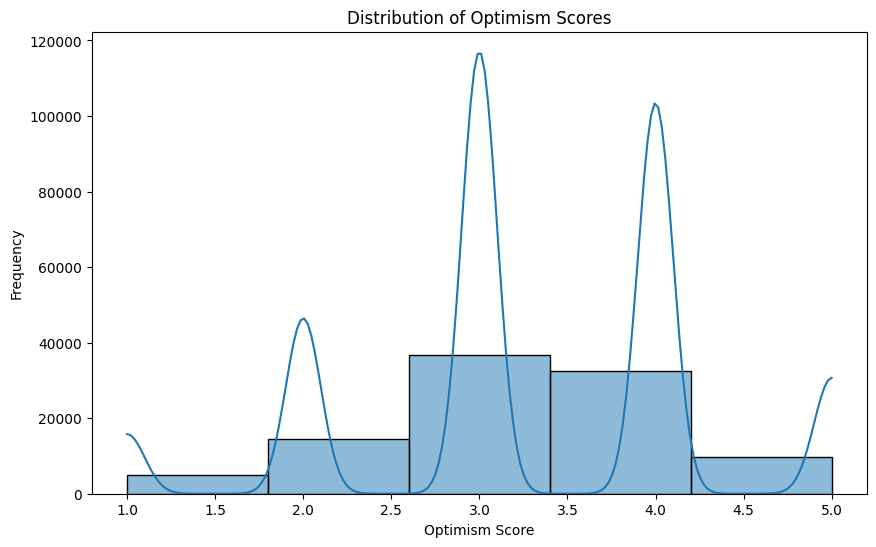

In [7]:
# Plot distribution of a well-being indicator (e.g., 'Optm')
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Optm'], bins=5, kde=True)
plt.title('Distribution of Optimism Scores')
plt.xlabel('Optimism Score')
plt.ylabel('Frequency')
plt.show()

**Descriptive Analysis 2: Average Screen Time by Gender**

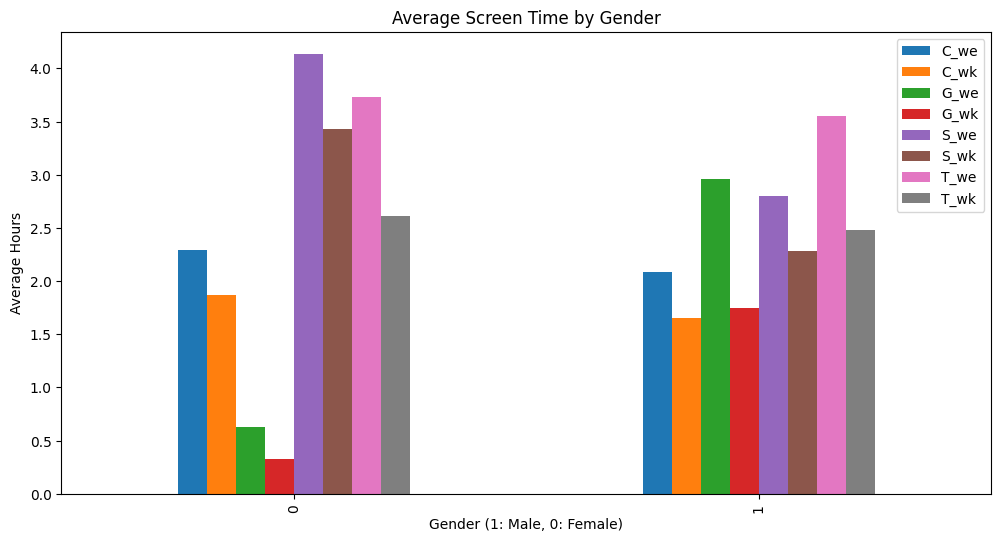

In [8]:
# Calculate average screen time for weekends and weekdays by gender
avg_screen_time_gender = merged_data.groupby('gender').mean()[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']]

# Plot average screen time by gender
avg_screen_time_gender.plot(kind='bar', figsize=(12, 6))
plt.title('Average Screen Time by Gender')
plt.xlabel('Gender (1: Male, 0: Female)')
plt.ylabel('Average Hours')
plt.show()


**Inferential Analysis 1: T-test for Well-being Differences Between High and Low Screen Time Groups**

In [9]:
# Define high and low screen time groups based on total screen time
merged_data['total_screen_time'] = merged_data[['C_wk', 'G_wk', 'S_wk', 'T_wk']].sum(axis=1)

# Create high and low screen time groups (median split)
high_screen_time = merged_data[merged_data['total_screen_time'] >= merged_data['total_screen_time'].median()]
low_screen_time = merged_data[merged_data['total_screen_time'] < merged_data['total_screen_time'].median()]

# Perform t-test on optimism scores between the two groups
t_stat, p_value = stats.ttest_ind(high_screen_time['Optm'], low_screen_time['Optm'])

print(f'T-test for Optimism Scores: t-statistic = {t_stat}, p-value = {p_value}')


T-test for Optimism Scores: t-statistic = -21.863843305216804, p-value = 1.0271101175643141e-105


**Inferential Analysis 2: Correlation Between Screen Time and Well-being**

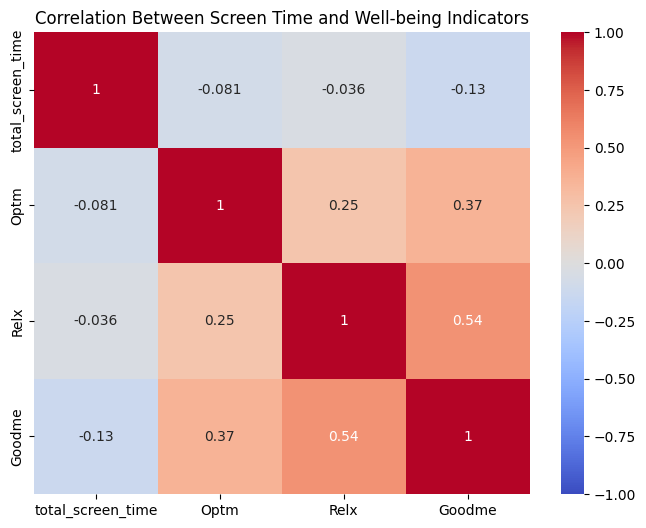

In [10]:
# Correlation between total screen time and well-being indicators
correlation_matrix = merged_data[['total_screen_time', 'Optm', 'Relx', 'Goodme']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Screen Time and Well-being Indicators')
plt.show()
